In [1]:
#Librerias a utilizar
import pandas as pd
from collections import Counter
import re
import io
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1. Se juntaron documentos con números crecientes de tokens hasta llegar a 1 millón de tokens.

In [3]:
url="https://gitlab.com/nlp-6/scrapping-wikipedia/-/raw/main/wikipedia_infofinal.csv"

In [4]:
read_data=requests.get(url).content

In [5]:
notas = pd.read_csv(io.StringIO(read_data.decode('utf-8')))

In [6]:
# Muestra del set de datos
notas.head()

review
0  7 World Trade Center (7 WTC) refers to two bui...
1  Chartwell is a country house near Westerham, K...
2  King Francis set his daughter-in-law an exampl...
3  The Cathedral of the Immaculate Conception of ...
4  If a chambered long barrow did indeed previous...

In [7]:
# Normalización y stemming.
#Como son comentarios vamos a quitar caracteres especiales y trabajar todo con minusculas.

In [8]:
## Hacemos un poco de data Preparation
notas_findal = pd.Series(notas['review']).str.lower()

In [9]:
#Tamaño de los Review
notas_findal.size

4180

In [10]:
#Declaracion de Variables
lista=[]
tokens=[]
del tokens[:]
del lista[:]



TotalToken=1000000

In [11]:
for x in range(0,notas_findal.size):
    text =notas_findal[x]
    tokens.extend ( re.split('\W+', text))
    y=len(tokens)
    z=np.unique(np.array(tokens)).itemsize
    lista.append([y,z,z/y])
    if y>TotalToken:
        break

In [12]:
#Convierto la lista en un dataframe para graficarlo despues
df = pd.DataFrame(lista, columns = ['ColToken', 'ColUnicos','ColProporcion'])

In [13]:
df

ColToken  ColUnicos  ColProporcion
0          152         68       0.447368
1          422         68       0.161137
2          659         68       0.103187
3          901         68       0.075472
4         1136         88       0.077465
...        ...        ...            ...
4175    795163        128       0.000161
4176    795354        128       0.000161
4177    795611        128       0.000161
4178    795893        128       0.000161
4179    795910        128       0.000161

[4180 rows x 3 columns]

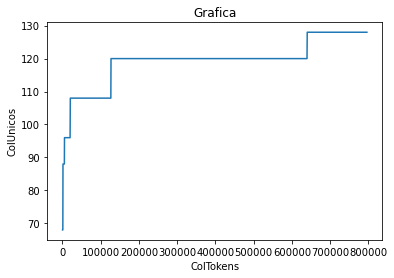

In [14]:
plt.plot(df.ColToken,df.ColUnicos)
plt.xlabel('ColTokens')
plt.ylabel('ColUnicos')
plt.title('Grafica')
plt.show()

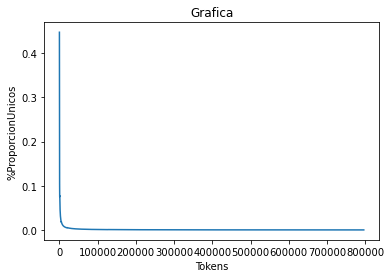

In [15]:
plt.plot(df.ColToken,df.ColProporcion)
plt.xlabel('Tokens')
plt.ylabel('%ProporcionUnicos')
plt.title('Grafica')
plt.show()

In [16]:
# Imprimir el Vocabulario

In [17]:
counts = Counter(tokens)
print(counts.most_common())

[('the', 55630), ('of', 26707), ('and', 23778), ('in', 21929), ('a', 15526), ('to', 14456), ('was', 10572), ('n', 8756), ('as', 7056), ('by', 5675), ('is', 5500), ('for', 5334), ('on', 5073), ('he', 4852), ('his', 4583), ('with', 4436), ('it', 3963), ('from', 3901), ('at', 3266), ('that', 3221), ('an', 3180), ('were', 2404), ('which', 2366), ('its', 2286), ('after', 2114), ('first', 2100), ('1', 2012), ('during', 1799), ('one', 1695), ('are', 1680), ('or', 1628), ('war', 1591), ('but', 1574), ('2', 1565), ('had', 1558), ('her', 1401), ('also', 1343), ('two', 1334), ('has', 1321), ('who', 1289), ('3', 1270), ('have', 1258), ('known', 1229), ('be', 1208), ('most', 1208), ('their', 1202), ('new', 1168), ('she', 1149), ('been', 1128), ('xa0', 1103), ('this', 1098), ('world', 1091), ('into', 1071), ('when', 1069), ('they', 1067), ('united', 1053), ('states', 1026), ('4', 1024), ('became', 1009), ('years', 996), ('other', 993), ('over', 967), ('5', 948), ('later', 940), ('', 930), ('between'

In [18]:
#Total de Tokens
len(tokens)

795910